<a href="https://colab.research.google.com/github/TanushVarma07/dbms_assignment/blob/main/price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [3]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv.zip to diamonds.csv.zip


In [4]:
data = pd.read_csv('diamonds.csv.zip')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


used to see data

In [5]:
data.shape

(53940, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


data preprocessing
the first row is not needed so drop it


In [7]:
data = data.drop(data.index[0])
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000,53939.000000
mean,26971.000000,0.797950,61.749410,57.457229,3932.866590,5.731190,5.734558,3.538754
std,15570.992422,0.474009,1.432634,2.234486,3989.446491,1.121745,1.142120,0.705689
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13486.500000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26971.000000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.500000,1.040000,62.500000,59.000000,5324.500000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53919, 11)

the data with x,y,z = 0 is removed so the shape of data is decreased

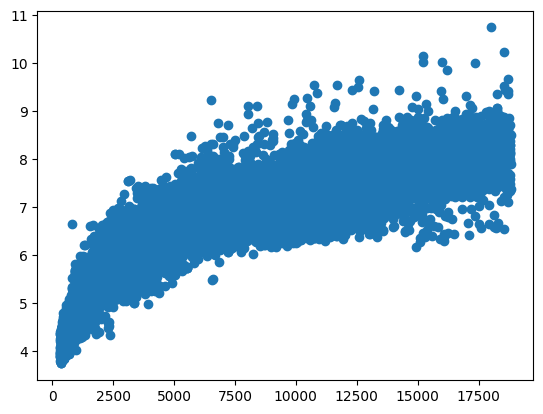

In [9]:
plt.scatter(data["price"],data["x"])
plt.show()

represent scatter plot with x,depth
wrong
how relations are made

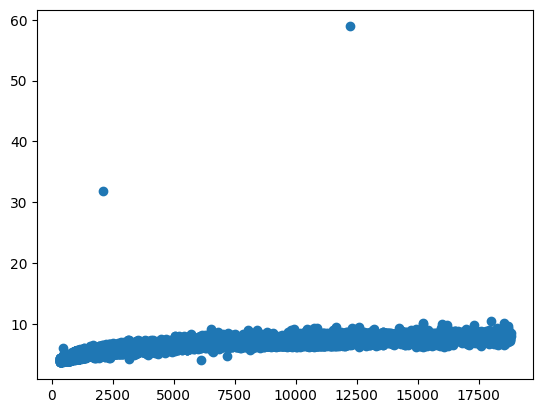

In [10]:
plt.scatter(data["price"],data["y"])
plt.show()

represent scatter plot with y,depth

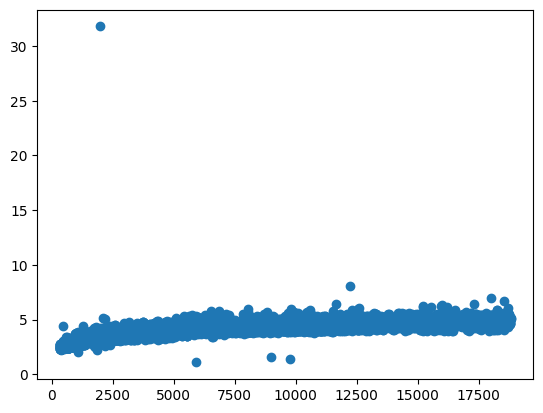

In [11]:
plt.scatter(data["price"],data["z"])
plt.show()

represent scatter plot with z,depth

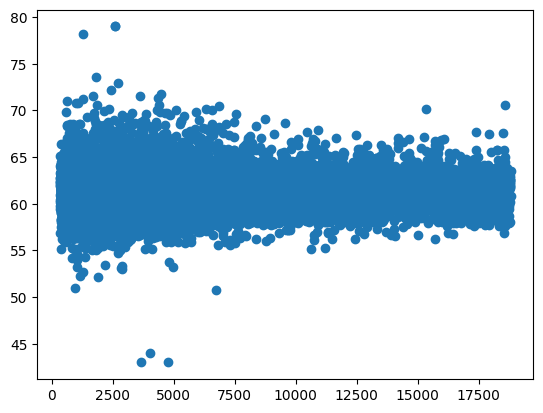

In [12]:
plt.scatter(data["price"],data["depth"])
plt.show()

represent scatter plot with price,depth

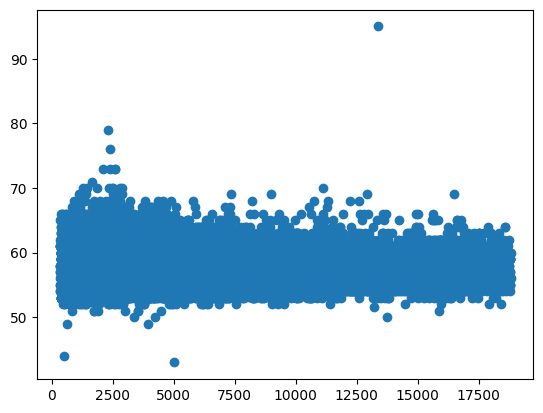

In [13]:
plt.scatter(data["price"],data["table"])
plt.show()

represent scatter plot with price,table

In [27]:
data = data.drop(data[data['x'] > 30].index)
data = data.drop(data[data['y'] > 30].index)
data = data.drop(data[data['z'] > 30].index)
data = data.drop(data[(data['depth'] > 75) | (data['depth'] < 50)].index)
data = data.drop(data[(data['table'] > 75) | (data['table'] < 50)].index)
data.shape

(53900, 11)

removed the outliers by seeing the graphs

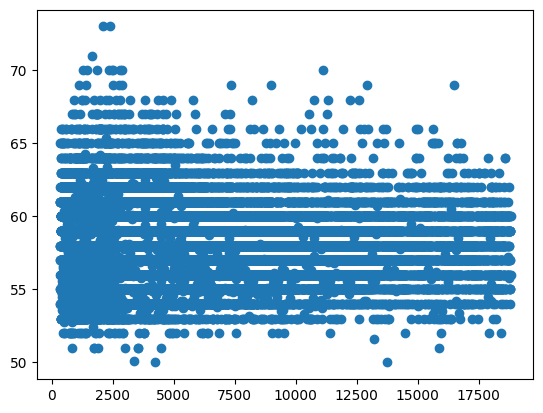

In [28]:
plt.scatter(data["price"],data["table"])
plt.show()

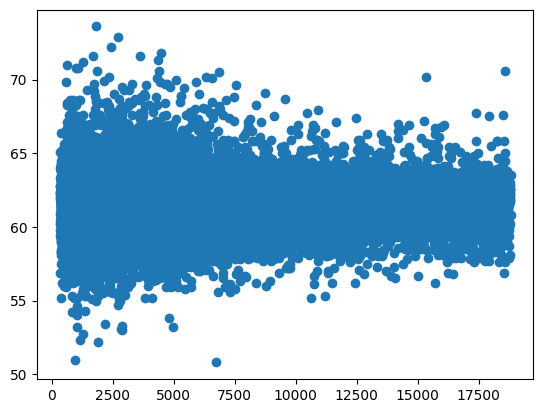

In [29]:
plt.scatter(data["price"],data["depth"])
plt.show()

for cross-verification

In [ ]:
ax=sns.pairplot(data, hue= "cut")


pairplots

In [ ]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)